#Anvesha Raikwar
##21070126017
###AIML A1

Saving best photo -2.jpg to best photo -2.jpg


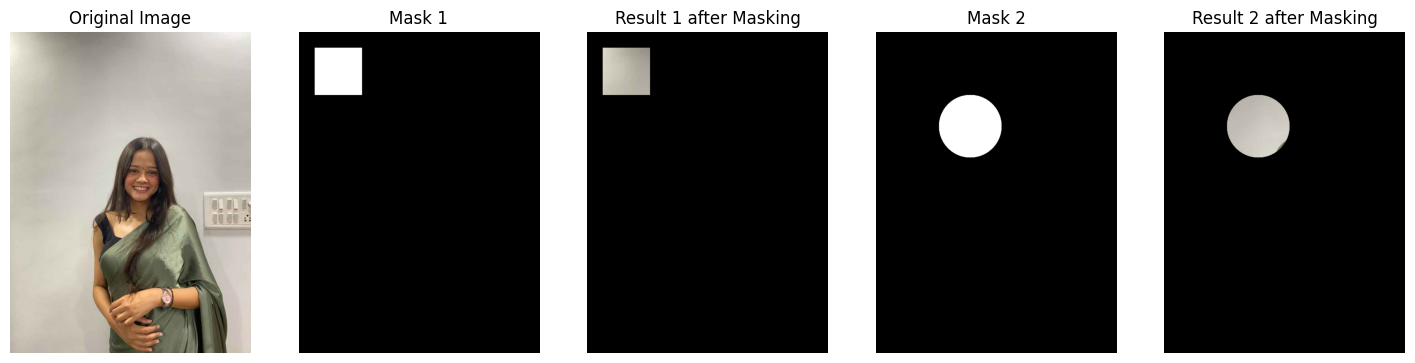

In [6]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)

# Creating two different binary masks
mask1 = np.zeros_like(image, dtype=np.uint8)
cv2.rectangle(mask1, (50, 50), (200, 200), (255, 255, 255), thickness=cv2.FILLED)

mask2 = np.zeros_like(image, dtype=np.uint8)
cv2.circle(mask2, (300, 300), 100, (255, 255, 255), thickness=cv2.FILLED)

# Applying the masks to the image
result1 = cv2.bitwise_and(image, mask1)
result2 = cv2.bitwise_and(image, mask2)

plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(mask1[:, :, 0], cmap='gray')
plt.title('Mask 1')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('Result 1 after Masking')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(mask2[:, :, 0], cmap='gray')
plt.title('Mask 2')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Result 2 after Masking')
plt.axis('off')

plt.show()


Saving best photo -2.jpg to best photo -2 (1).jpg


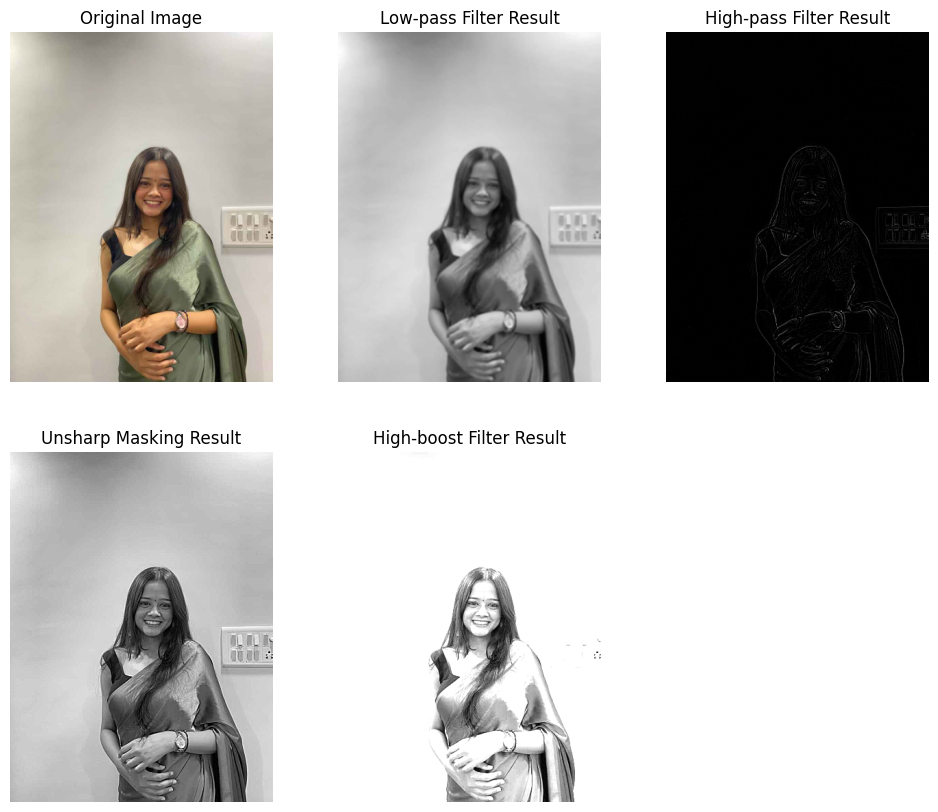

In [7]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def low_pass_filter(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def high_pass_filter(image, kernel_size):
    return cv2.subtract(image, low_pass_filter(image, kernel_size))

def unsharp_masking(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

def high_boost_filter(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    mask = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return cv2.add(image, mask)

# Image upload
uploaded = files.upload()

# Path of the uploaded image
image_path = list(uploaded.keys())[0]

# Read the uploaded image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the grayscale image to half of its original size
resized_gray_image = cv2.resize(gray_image, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Apply low-pass filter
low_pass_result = low_pass_filter(resized_gray_image, kernel_size=5)

# Apply high-pass filter
high_pass_result = high_pass_filter(resized_gray_image, kernel_size=5)

# Apply unsharp masking
unsharp_mask_result = unsharp_masking(resized_gray_image)

# Apply high-boost filtering
high_boost_result = high_boost_filter(resized_gray_image)

# Display the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(cv2.resize(image, (0, 0), fx=0.5, fy=0.5), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Low-pass Filter Result')
plt.imshow(low_pass_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('High-pass Filter Result')
plt.imshow(high_pass_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Unsharp Masking Result')
plt.imshow(unsharp_mask_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('High-boost Filter Result')
plt.imshow(high_boost_result, cmap='gray')
plt.axis('off')

plt.show()




Saving best photo -2.jpg to best photo -2 (2).jpg


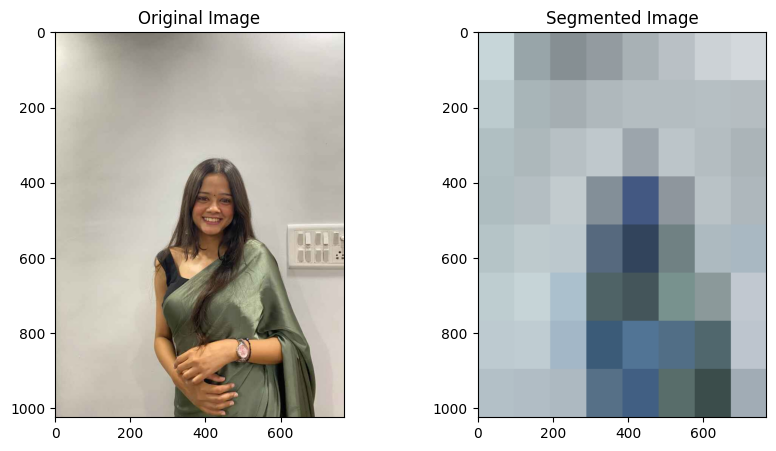

In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

# Function for image segmentation using split and merging
def split_and_merge(image, min_size=100):
    # Get image dimensions
    rows, cols, _ = image.shape

    # Check if the image size is smaller than the specified min_size
    if rows < min_size or cols < min_size:
        return np.mean(image, axis=(0, 1))

    # Split the image into quadrants
    top_left = image[:rows//2, :cols//2, :]
    top_right = image[:rows//2, cols//2:, :]
    bottom_left = image[rows//2:, :cols//2, :]
    bottom_right = image[rows//2:, cols//2:, :]

    # Merge quadrants based on average color
    avg_color_tl = np.mean(top_left, axis=(0, 1))
    avg_color_tr = np.mean(top_right, axis=(0, 1))
    avg_color_bl = np.mean(bottom_left, axis=(0, 1))
    avg_color_br = np.mean(bottom_right, axis=(0, 1))

    # Recursively split and merge each quadrant
    merged_image = np.zeros_like(image, dtype=np.uint8)
    merged_image[:rows//2, :cols//2, :] = split_and_merge(top_left, min_size)
    merged_image[:rows//2, cols//2:, :] = split_and_merge(top_right, min_size)
    merged_image[rows//2:, :cols//2, :] = split_and_merge(bottom_left, min_size)
    merged_image[rows//2:, cols//2:, :] = split_and_merge(bottom_right, min_size)

    return merged_image

# Upload an image from your local system
uploaded = files.upload()

# Check if any file is uploaded
if len(uploaded) == 0:
    print("No file uploaded.")
else:
    # Load the uploaded image
    file_name = next(iter(uploaded))
    image_bytes = uploaded[file_name]
    image_np = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Check if the image is loaded successfully
    if image_np is None:
        print(f"Failed to load image: {file_name}")
    else:
        # Perform split and merge segmentation
        segmented_image = split_and_merge(image_np)

        # Display the original and segmented images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image)
        plt.title('Segmented Image')

        plt.show()